In [1]:
import re

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

In [5]:
df = pd.read_csv('data/processed/1.0_FEAT_ENG_flats.csv')
print(df.shape)
df.head(3)

(2654, 33)


,link,society,price,area,bedRoom,bathroom,balcony,facing,agePossession,nearbyLocations,...,sector,built_up_area,carpet_area,super_built_up_area,study room,servant room,store room,pooja room,others,furnish_type
0,2-bhk-bedroom-apartment-flat-for-sale-in-krish...,maa bhagwati residency,45.0,900,2,2,1,West,Relatively New,"['Chintapurni Mandir', 'State bank ATM', 'Pear...",...,sector 007,NaN,900.0,NaN,0,0,0,0,0,1
1,2-bhk-bedroom-apartment-flat-for-sale-in-apna-...,Apna Enclave,50.0,650,2,2,1,West,Old Property,"['Chintapurni Mandir', 'Sheetla Mata Mandir', ...",...,sector 046b,NaN,650.0,NaN,0,0,0,0,0,0
2,2-bhk-bedroom-apartment-flat-for-sale-in-tulsi...,Tulsiani Easy in Homes,40.0,595,2,2,3,NaN,New Property,"['Huda City Metro', 'Golf Course extn road', '...",...,sector 033,NaN,595.0,NaN,0,0,0,0,0,1


In [6]:
df.columns.tolist()

['link',
 'society',
 'price',
 'area',
 'bedRoom',
 'bathroom',
 'balcony',
 'facing',
 'agePossession',
 'nearbyLocations',
 'description',
 'features',
 'property_id',
 'nthFloor',
 'totalFloor',
 'Transportation',
 'Education',
 'Healthcare',
 'Shopping',
 'Dining',
 'Accommodation',
 'Entertainment',
 'Service',
 'sector',
 'built_up_area',
 'carpet_area',
 'super_built_up_area',
 'study room',
 'servant room',
 'store room',
 'pooja room',
 'others',
 'furnish_type']

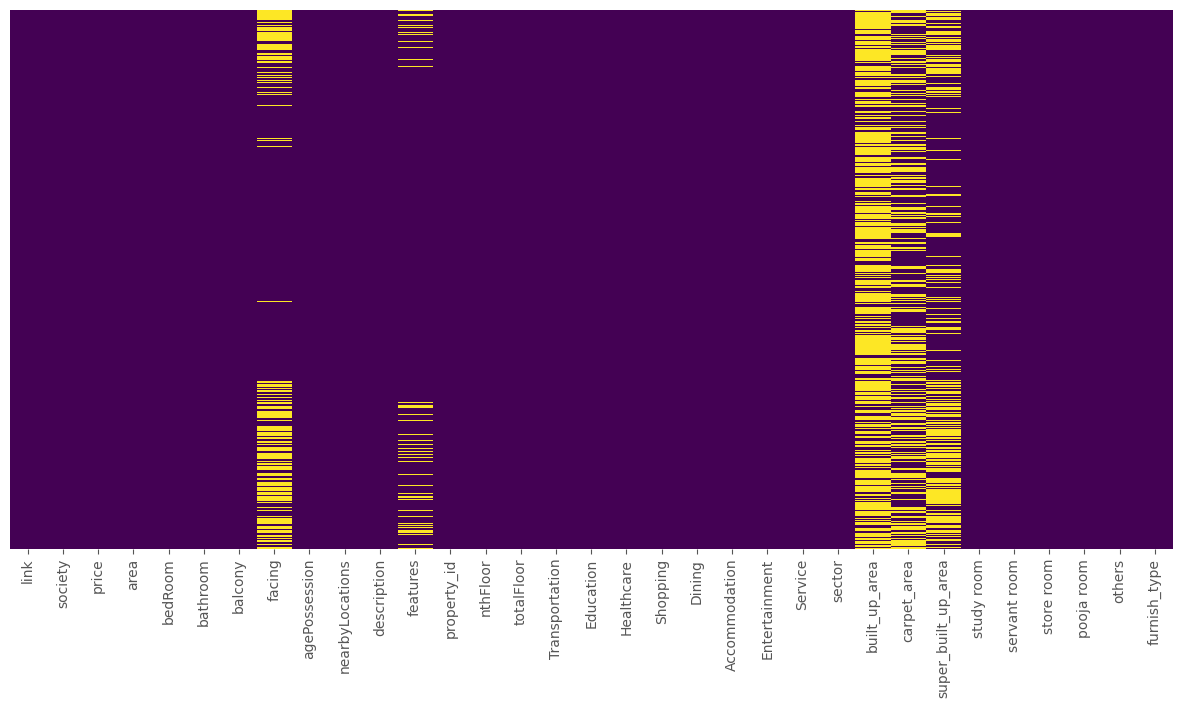

In [7]:
plt.figure(figsize=(15, 7))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels='')
plt.show()

## address -> sectorNum

In [8]:
df['sector'].nunique()

104

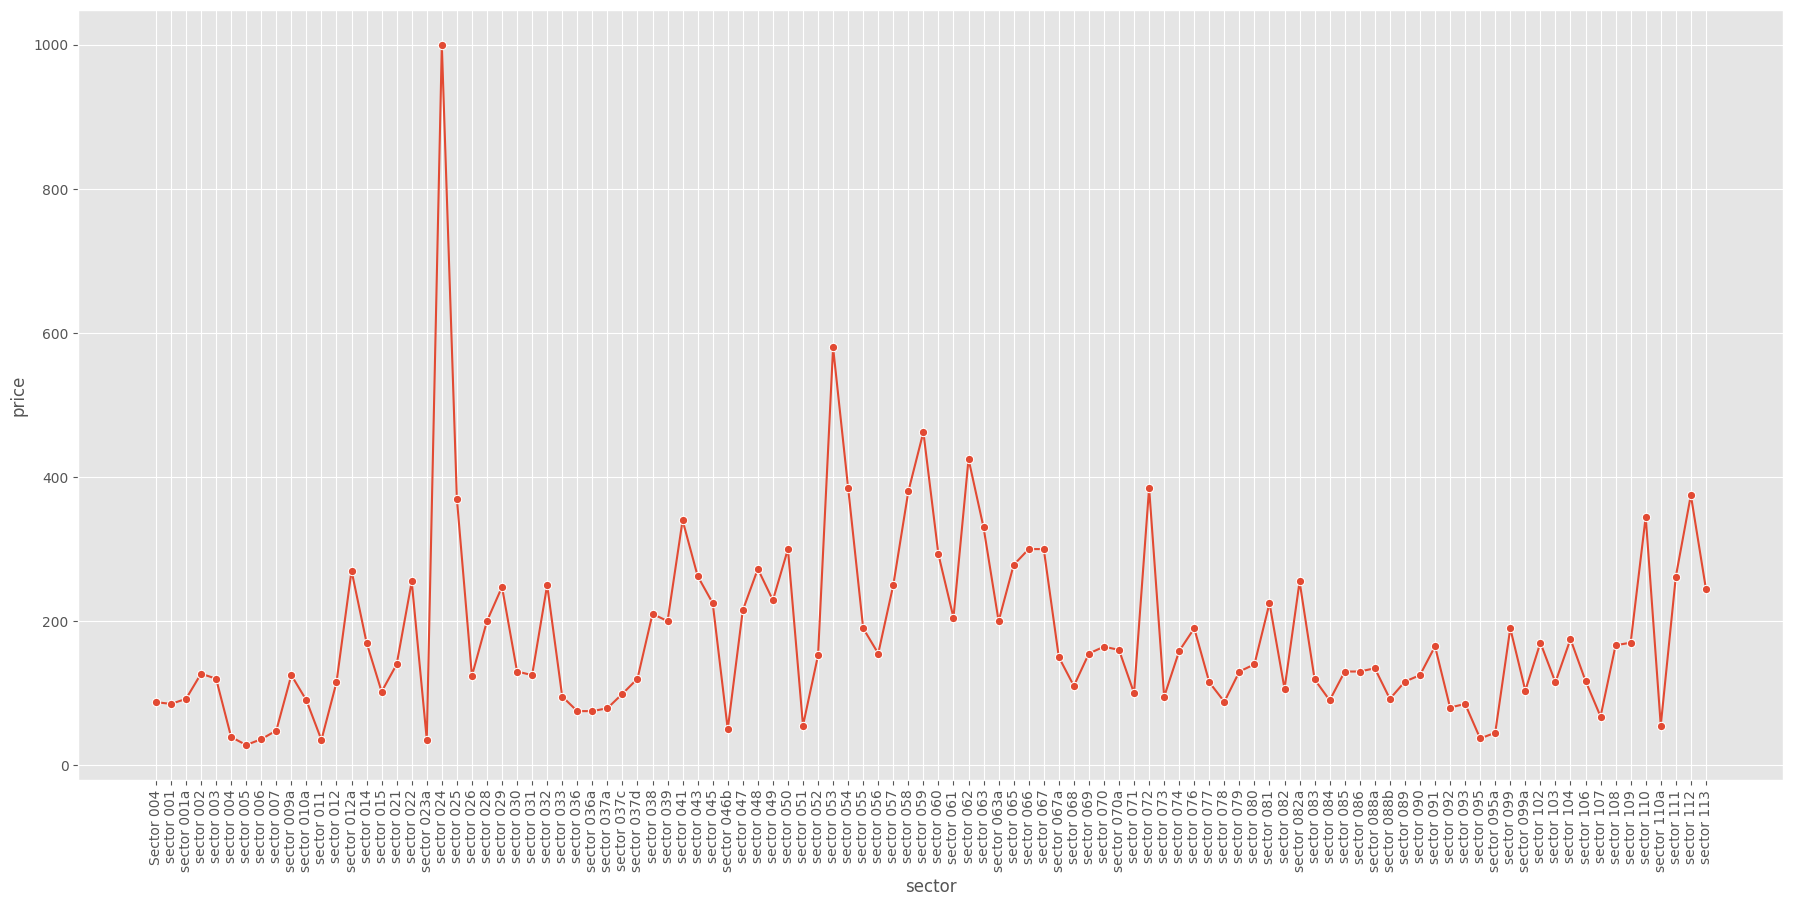

In [12]:
# Plot a graph showing sector-wise average price
plt.figure(figsize=(22, 10))
sns.lineplot(
    df.sort_values('sector'),
    x='sector',
    y='price',
    errorbar=('ci', 0),
    marker='o',
    estimator='median',
)
plt.xticks(rotation=90)
plt.show()

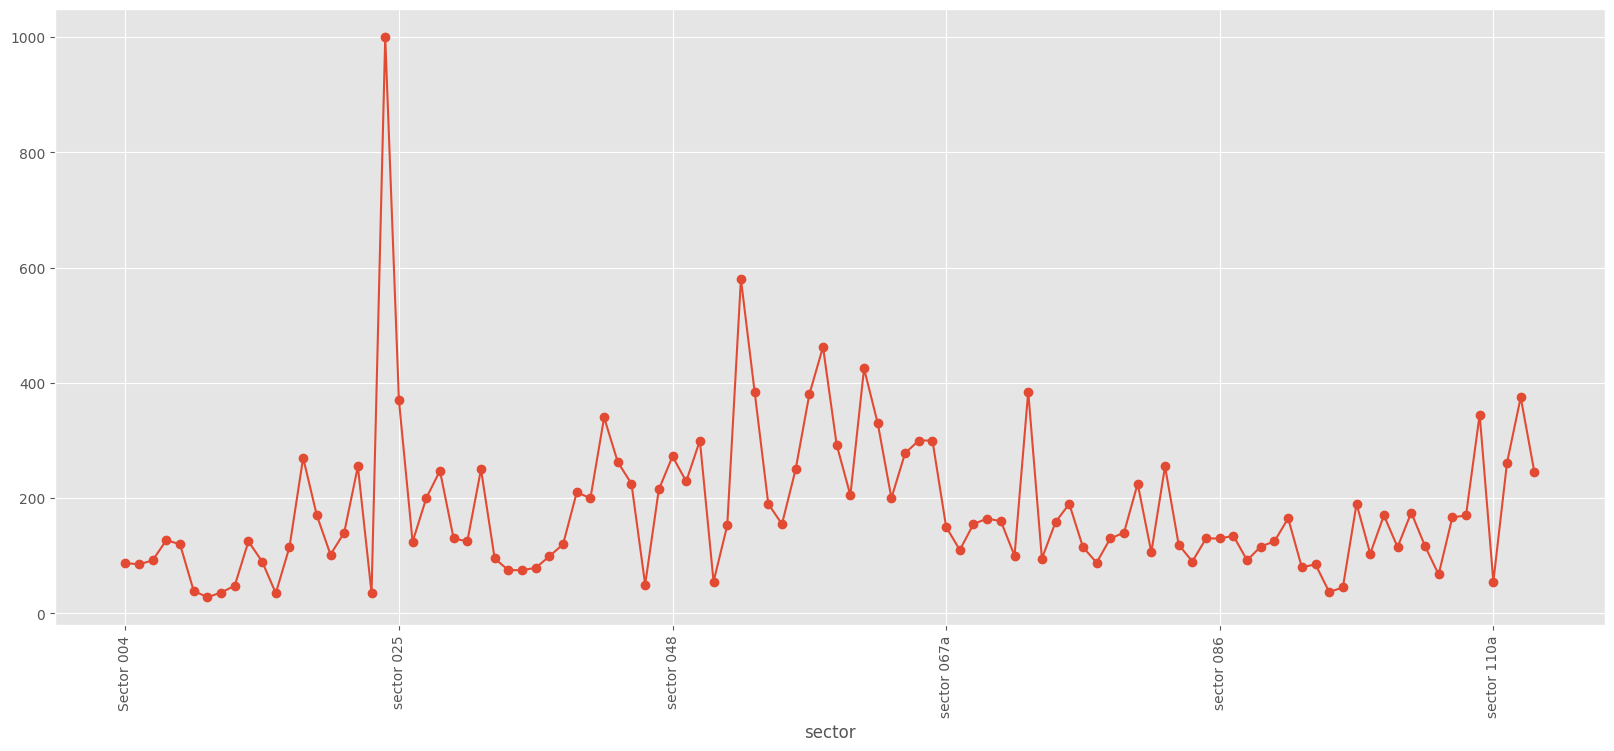

In [13]:
df.groupby('sector')['price'].median().sort_index().plot(figsize=(20, 8), marker='o', grid=True)
plt.xticks(rotation=90)
plt.show()

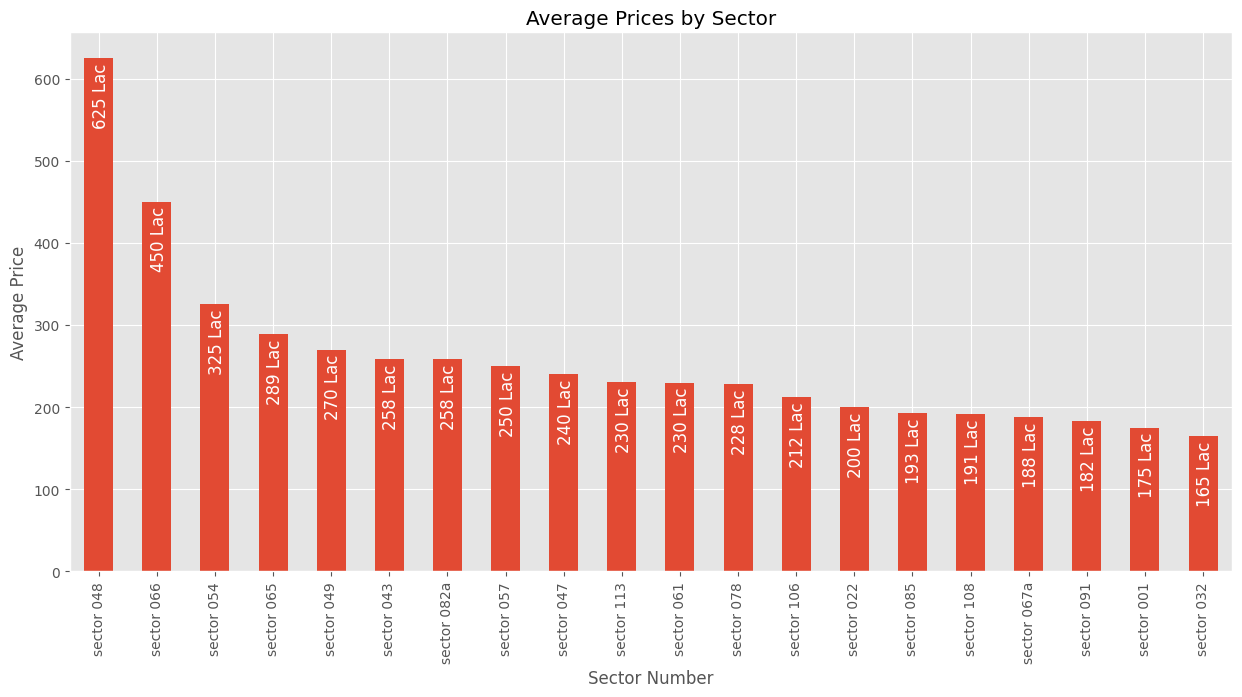

In [16]:
# Grouping by sectorNum and calculating the mean price
avg_prices = df.loc[:200].groupby('sector')['price'].mean().sort_values(ascending=False)[:20]

# Plotting the average prices for each sector
plt.figure(figsize=(15, 7))
ax: plt.Axes = avg_prices.plot(kind='bar')

plt.xticks(rotation=90)
plt.title('Average Prices by Sector')
plt.xlabel('Sector Number')
plt.ylabel('Average Price')


# Adding price values as text on the bars
for bar in ax.patches:
    plt.text(
        (bar.get_x() + (bar.get_width() // 2)) + 0.13,
        bar.get_height() - 80,
        f"{round(bar.get_height())} Lac",
        color='white',
        rotation=90,
        fontsize=12,
    )

plt.show()